## Preprocesado



###Configuracion

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as mpe
import os
import calendar
import math

!pip install matplotlib --upgrade colors

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)
ERROR: Could not find a version that satisfies the requirement colors (from versions: none)
ERROR: No matching distribution found for colors


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Carga de datos preprocesados

In [ ]:
dirPath='/content/gdrive/MyDrive/1970presente/Preprocesados1/'

In [ ]:
big_data = pd.read_csv(os.path.join(dirPath,'big_data.csv')).reset_index(drop=True)

data_stations = pd.read_csv(os.path.join(dirPath,'data_stations_plus.csv')).reset_index(drop=True)

pr_data_M = pd.read_csv(os.path.join(dirPath,'pr_data_M.csv')).reset_index(drop=True)
qflx_data_M = pd.read_csv(os.path.join(dirPath,'qflx_data_M.csv')).reset_index(drop=True)
tas_data_M = pd.read_csv(os.path.join(dirPath,'tas_data_M.csv')).reset_index(drop=True)
tasmin_data_M = pd.read_csv(os.path.join(dirPath,'tasmin_data_M.csv')).reset_index(drop=True)
tasmax_data_M = pd.read_csv(os.path.join(dirPath,'tasmax_data_M.csv')).reset_index(drop=True)

pr_data = pd.read_csv(os.path.join(dirPath+'SinAgrupar/','pr_data.csv')).reset_index(drop=True)
qflx_data = pd.read_csv(os.path.join(dirPath+'SinAgrupar/','qflx_data.csv')).reset_index(drop=True)
tas_data = pd.read_csv(os.path.join(dirPath+'SinAgrupar/','tas_data.csv')).reset_index(drop=True)
tasmin_data = pd.read_csv(os.path.join(dirPath+'SinAgrupar/','tasmin_data.csv')).reset_index(drop=True)
tasmax_data = pd.read_csv(os.path.join(dirPath+'SinAgrupar/','tasmax_data.csv')).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###Revision datos

In [ ]:
big_data.head()

codigo_estacion       fecha  ...                  region tipo_medicion
0        10130001  1970-01-31  ...  Región de la Araucanía            pr
1        10130001  1970-02-28  ...  Región de la Araucanía            pr
2        10130001  1970-03-31  ...  Región de la Araucanía            pr
3        10130001  1970-04-30  ...  Región de la Araucanía            pr
4        10130001  1970-05-31  ...  Región de la Araucanía            pr

[5 rows x 16 columns]

In [ ]:
data_stations.head()

codigo_estacion institucion  ...   pais                        region
0         1000005         DGA  ...  Chile  Región de Arica y Parinacota
1         1001001         DGA  ...  Chile  Región de Arica y Parinacota
2         1001002         DGA  ...  Chile  Región de Arica y Parinacota
3         1001003         DGA  ...  Chile  Región de Arica y Parinacota
4         1001005         DGA  ...  Chile  Región de Arica y Parinacota

[5 rows x 13 columns]

In [ ]:
pr_data.head()

codigo_estacion  01000005  01200002  ...  AYW00088703  AYW00088702  AYW00090001
0      1970-01-01       5.0       NaN  ...          NaN          NaN          0.0
1      1970-01-02       0.0       NaN  ...          NaN          NaN          0.0
2      1970-01-03      10.0       NaN  ...          NaN          NaN          0.0
3      1970-01-04       3.0       NaN  ...          NaN          NaN          0.0
4      1970-01-05       0.0       NaN  ...          NaN          NaN          0.0

[5 rows x 1255 columns]

###Formateo tablas de mediciones

In [ ]:
import datetime
pr_data = pr_data.rename(columns={'codigo_estacion':'fecha'})
qflx_data = qflx_data.rename(columns={'codigo_estacion':'fecha'})
tas_data = tas_data.rename(columns={'codigo_estacion':'fecha'})
tasmin_data = tasmin_data.rename(columns={'codigo_estacion':'fecha'})
tasmax_data = tasmax_data.rename(columns={'codigo_estacion':'fecha'})

pr_data['fecha'] = pr_data['fecha'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))
qflx_data['fecha'] = qflx_data['fecha'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))
tas_data['fecha'] = tas_data['fecha'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))
tasmin_data['fecha'] = tasmin_data['fecha'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))
tasmax_data['fecha'] = tasmax_data['fecha'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
qflx_data.head()

fecha  01201005  01201002  ...  12876004  12825002  12930001
0 1970-01-01       NaN     0.900  ...       NaN       NaN       NaN
1 1970-01-02       NaN     0.865  ...       NaN       NaN       NaN
2 1970-01-03       NaN     0.948  ...       NaN       NaN       NaN
3 1970-01-04       NaN     0.985  ...       NaN       NaN       NaN
4 1970-01-05       NaN     0.968  ...       NaN       NaN       NaN

[5 rows x 810 columns]

In [ ]:
# Quita mediciones de precipitacion negativas
num = pr_data._get_numeric_data()
num[num < 0] = np.nan

##Visualizaciones

Se utilizara un submuestreo llamado selected_stations para asi reducir la cantidad de estaciones a revisar y poder tener datos relevantes.

In [ ]:
selected_stations=['BR000082861','BR039402250','BRM00082723','PEM00084401','PE000084377','COM00080234','VEM00080479','BLO000085223',
                   '12930005','11546001','ARM00087814','180005','200006','220002','270008','290004','330007','330020','340021','360011','370033','38003','390006','400009']

In [ ]:
def stations(pais=None, region=None):
  stat = data_stations
  if pais is not None:
    stat = stat[stat['pais']==pais]
  if region is not None:
    stat = stat[stat['region']==region]
  stat = stat.iloc[:,0].to_list()
  return stat

### Spiral

Esta casi listo, aun falta revisar la escala de la barra de la derecha -> Aun cuando la visualizacion se muestre con una normalizacion raiz cuadrada o lagairtmica, la barra se muestra lineal.

Deje comentado al final del siguiene cuadro, un intento para corregirlo, pero al parecer solo funciona bien con la escala raiz cuadrada, la logaritmica se ve rara.

In [ ]:
def _forward(x):
  return np.log(x) if x is not None else None
def _inverse(x):
  return math.e**x

def spiral(data, unidad, titulo, min=None, max=None, pais=None, region=None, p=0, norm=0, LINEWIDTH=6, EDGEWIDTH=0, CAPSTYLE='projecting', COLORMAP='viridis', ALPHA=1, FIRSTMONTH=0):

  estaciones = stations(pais, region)

  spiral_data = data.iloc[:,0]
  cols = data.columns.to_list()
  for st in estaciones:
    if st in cols:
      spiral_data =  pd.concat([spiral_data, data[st]], axis=1)
  spiral_data["medicion"] = spiral_data.mean(axis=1)
  spiral_data = spiral_data[['fecha','medicion']]

  # set origin at the first FIRSTDAY before the first trip, midnight
  first_trip = spiral_data["fecha"].min()
  origin = first_trip - np.timedelta64(first_trip.month - FIRSTMONTH - 1, 'M')
  months = pd.date_range(origin, origin + np.timedelta64(1, 'Y'), freq="M").strftime("%b").tolist()

  # convert trip timestamps to week fractions
  spiral_data['start'] = (spiral_data['fecha'] - origin) / np.timedelta64(1, 'Y')
  spiral_data['stop'] = (spiral_data['fecha'] - origin + np.timedelta64(23, 'h')) / np.timedelta64(1, 'Y')

  # sort dataset so shortest trips are plotted last
  # should prevent longer events to cover shorter ones, still suboptimal
  spiral_data = spiral_data.sort_values("medicion", ascending=False).reset_index()

  fig = plt.figure(figsize=(16, 12))
  ax = fig.gca(projection="polar")

  vmin = spiral_data['medicion'].min() if min is None else min
  vmax = spiral_data['medicion'].max() if max is None else max

  for idx, event in spiral_data.iterrows():

      # sample normalized distance from colormap
      if not math.isnan(event['medicion']):
          if norm==0:
            ndist = (event['medicion']+p - vmin+p) / (vmax+p-vmin+p)
          elif norm==1:
            ndist = (np.sqrt(event['medicion']+p) - np.sqrt(vmin+p)) / (np.sqrt(vmax+p)-np.sqrt(vmin+p))
          else:
            ndist = (np.log(event['medicion']+p) - np.log(vmin+p)) / (np.log(vmax+p)-np.log(vmin+p))
          color = plt.cm.get_cmap(COLORMAP)(ndist)
      else:
        color = "White"

      tstart, tstop = event.loc[['start', 'stop']]

      # timestamps are in week fractions, 2pi is one week
      nsamples = int(1000. * (tstop - tstart))
      t = np.linspace(tstart, tstop, nsamples)
      theta = 2 * np.pi * t
      arc, = ax.plot(theta, t, lw=LINEWIDTH, color=color, solid_capstyle=CAPSTYLE, alpha=ALPHA)
      if EDGEWIDTH > 0:
          arc.set_path_effects([mpe.Stroke(linewidth=LINEWIDTH+EDGEWIDTH, foreground='black'), mpe.Normal()])

  # grid and labels
  ax.set_rticks([])
  ax.set_theta_zero_location("N")
  ax.set_theta_direction(-1)
  ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
  ax.set_xticklabels(months)
  ax.tick_params('x', pad=2)
  ax.grid(True)

  # setup a custom colorbar, everything's always a bit tricky with mpl colorbars
  if norm==0:
    norma = mpl.colors.Normalize(vmin=vmin+p, vmax=vmax+p)
  elif norm==1:
    norma = mpl.colors.PowerNorm(gamma=0.5, vmin=vmin+p, vmax=vmax+p)
  else:
    norma = mpl.colors.FuncNorm((_forward, _inverse), vmin=vmin+p, vmax=vmax+p)
    #norma = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
  sm = plt.cm.ScalarMappable(cmap=COLORMAP, norm=norma)
  sm.set_array([])
  plt.colorbar(sm, ticks=np.linspace(vmin, vmax, 12), fraction=0.04, aspect=60, pad=0.1, label=unidad, ax=ax, extend='max')
  plt.title(titulo, size=20, color="Black", y=1.06)
  plt.savefig(titulo+".png", pad_inches=0, bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


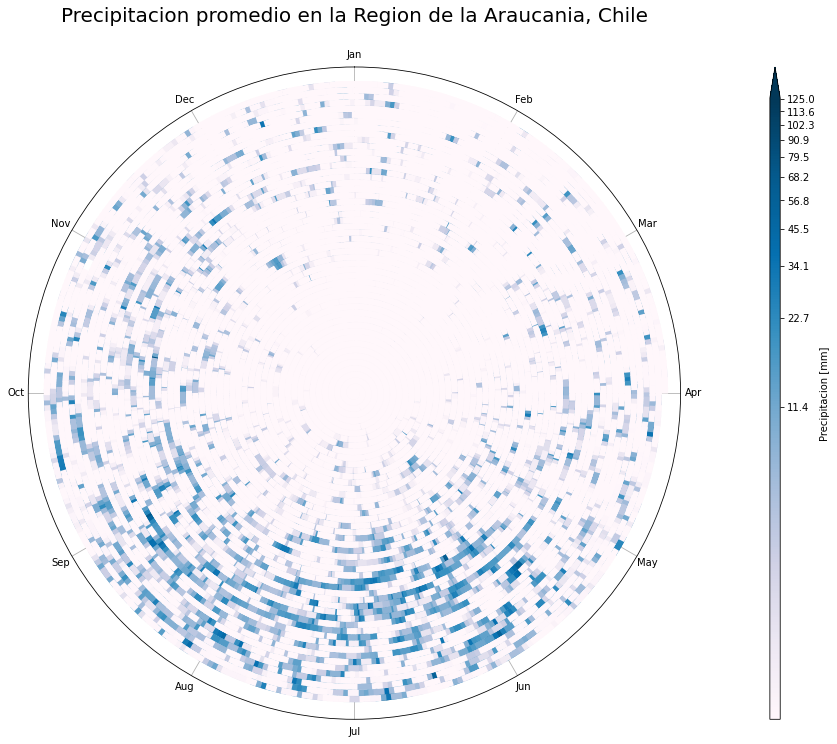

In [ ]:
spiral(pr_data, 'Precipitacion [mm]', 'Precipitacion promedio en la Region de la Araucania, Chile', pais='Chile', region='Región de la Araucanía',max=125, p=1, norm=2, COLORMAP='PuBu')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


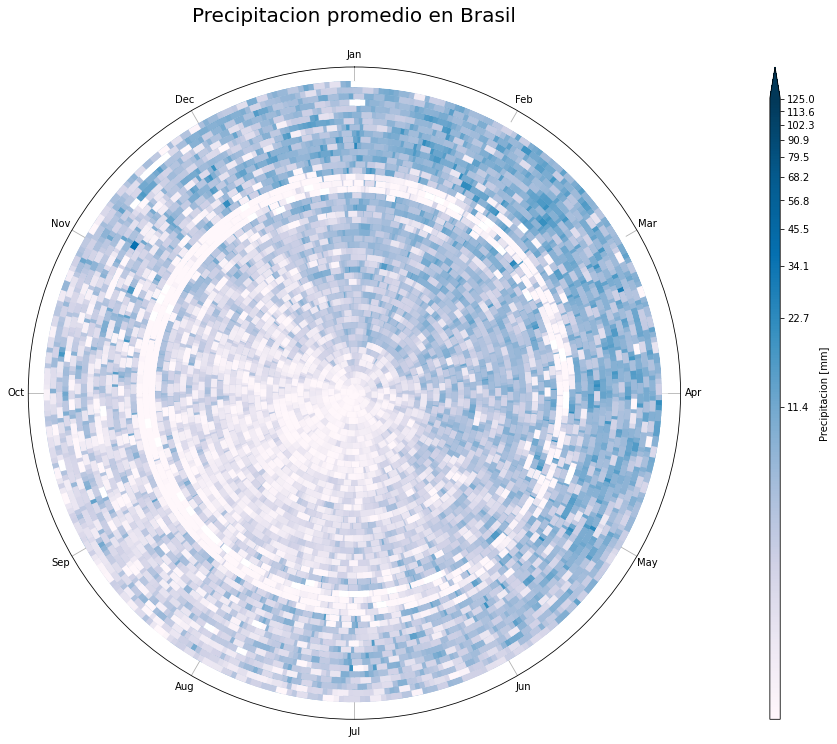

In [ ]:
spiral(pr_data, 'Precipitacion [mm]', 'Precipitacion promedio en Brasil', pais='Brasil', max=125, p=1, norm=2, COLORMAP='PuBu')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


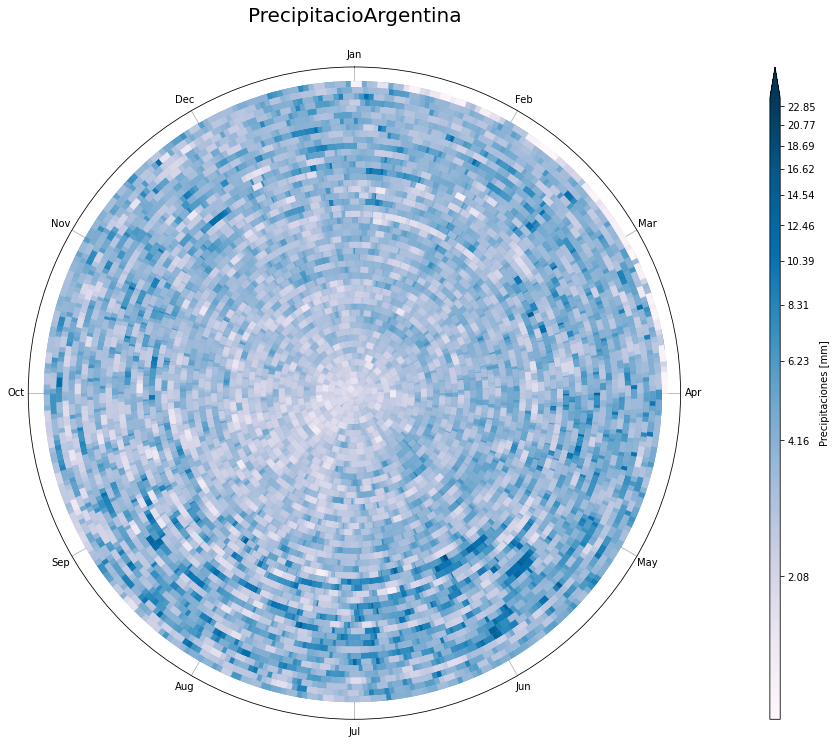

In [ ]:
spiral(pr_data, 'Precipitaciones [mm]', 'Precipitacio' 'Argentina', p=1, norm=2, COLORMAP='PuBu')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  del sys.path[0]


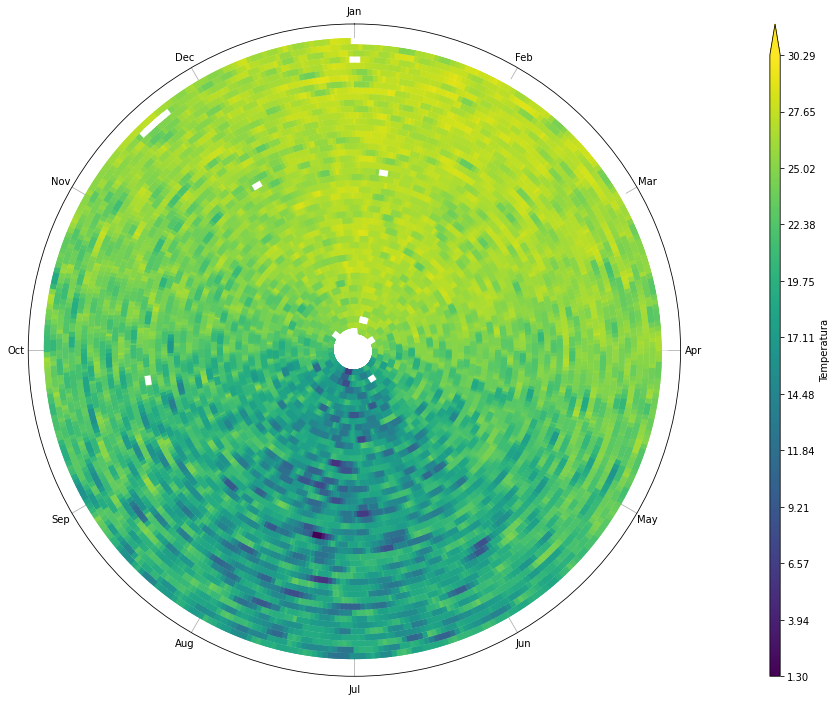

In [ ]:
spiral(tas_data, 'Temperatura', 'Argentina', p=1, norm=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  from ipykernel import kernelapp as app


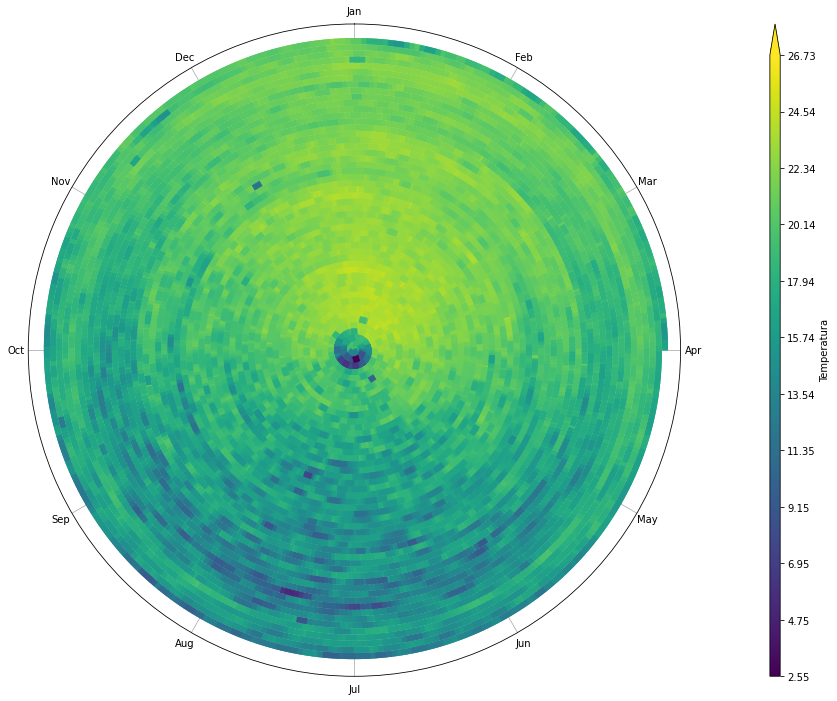

In [ ]:
spiral(tas_data, 'Temperatura', p=1, norm=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # Remove the CWD from sys.path while we load stuff.


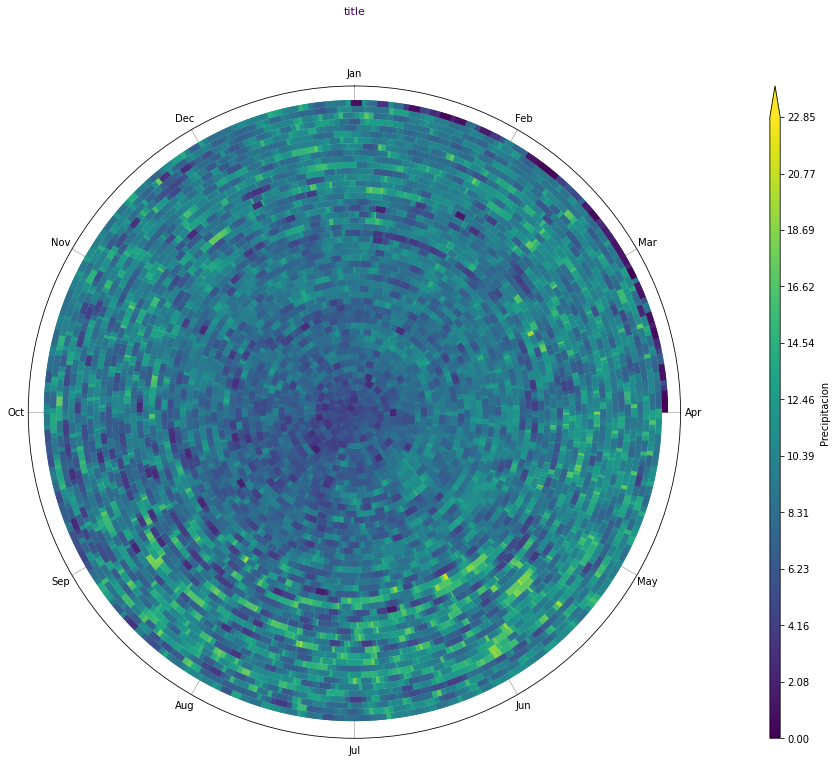

In [ ]:
spiral(pr_data, 'Precipitacion', p=1, norm=2)

### Space-Time Cube

### Tilemap

In [ ]:
def data_formatter(data, tipo_medicion, desde, hasta, pais, region):
  medicion = data[(data.tipo_medicion == tipo_medicion) & (data.pais == pais)].copy()
  medicion['año'] = pd.DatetimeIndex(medicion['fecha']).year
  medicion['mes'] = pd.DatetimeIndex(medicion['fecha']).month
  #medicion['dia'] = pd.DatetimeIndex(medicion['fecha']).day

  if region is not None:
    medicion = medicion[medicion.region == region].copy()

  #parche para arreglar precipitaciones negativas
  if tipo_medicion == "pr":
    medicion = medicion[medicion.value >= 0].copy()

  tr = medicion[(medicion.año >= desde) & (medicion.año <= hasta)]
  avg = tr.groupby(["mes", "año"]).mean()
  X = []
  temp = []
  for index, row in avg.iterrows():
    temp.append(row["value"])
    if index[1] == hasta:
      X.append(temp)
      temp = []

  return np.array(X)

def tilemap(data, tipo_medicion, desde, hasta, pais = "Chile", region = None):
  fig, ax = plt.subplots(1,1,figsize=(25, 10))
  X = data_formatter(data, tipo_medicion, desde, hasta, pais, region)
  color = 'YlOrRd'
  if tipo_medicion == "pr" or tipo_medicion == "qflx":
    color = 'YlGnBu'
  img = ax.imshow(X, cmap=color, aspect='auto')
  
  n_años = hasta - desde + 1

  x_label_list = [i + desde for i in range(n_años)]
  y_label_list = ['Enero', 'Febrero', 'Marzo', 
                  'Abril', 'Mayo', 'Junio', 
                  'Julio', 'Agosto', 'Septiembre', 
                  'Octubre', 'Noviembre', 'Diciembre']

  ax.set_xticks([i for i in range(n_años)])
  ax.set_xticklabels(x_label_list)
  ax.set_yticks([i for i in range(13)])
  ax.set_yticklabels(y_label_list)

  tipo_medicion_dict = {
      "pr": "Precipitación",
      "tas": "Temperatura media",
      "tasmax": "Temperatura máxima",
      "tasmin": "Temperatura mínima",
      "qflx": "Caudal"
  }

  unidades_dict = {
      "pr": "mm",
      "tas": "°C",
      "tamax": "°C",
      "tasmin": "°C",
      "qflx": "m³/s"
  }
  title = tipo_medicion_dict[tipo_medicion] +" en " + pais
  if region is not None:
    title += ", " + region
  ax.set_title(title)
  if n_años > 21:
    plt.xticks(rotation=90)
  ax.axis('tight')
  cbar = fig.colorbar(img)
  cbar.set_label(unidades_dict[tipo_medicion], size = 14)

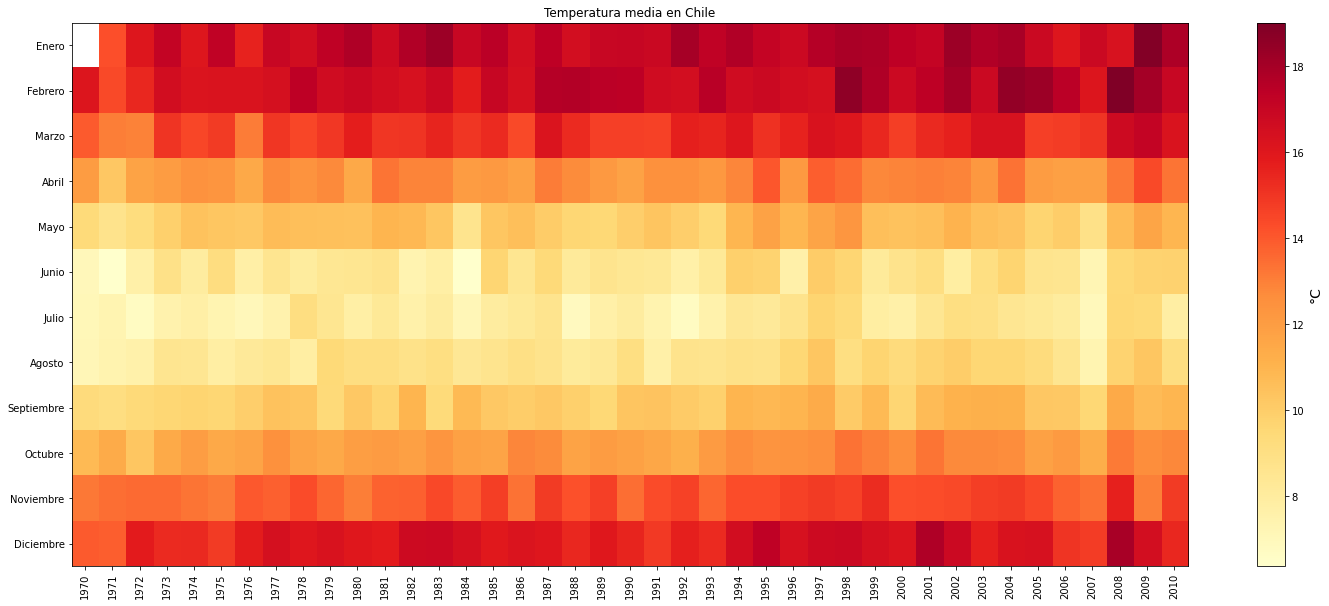

In [ ]:
tilemap(big_data, "tas", 1970, 2010)

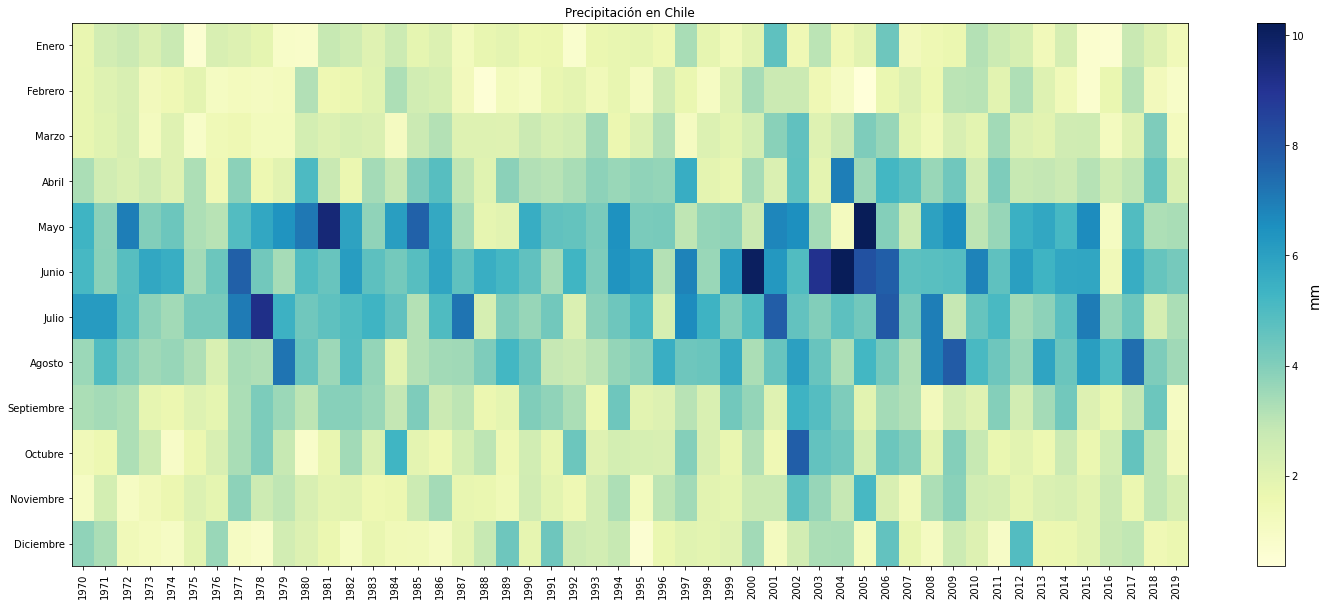

In [ ]:
tilemap(big_data, "pr", 1970, 2019)

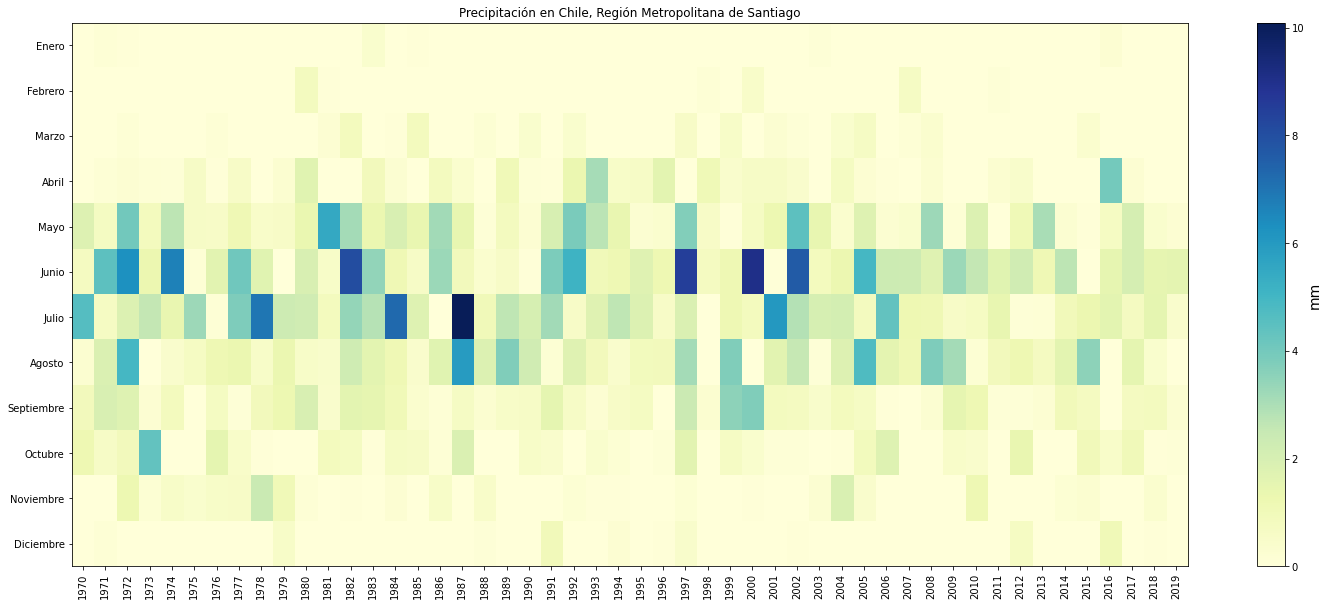

In [ ]:
tilemap(big_data, "pr", 1970, 2019, region='Región Metropolitana de Santiago')

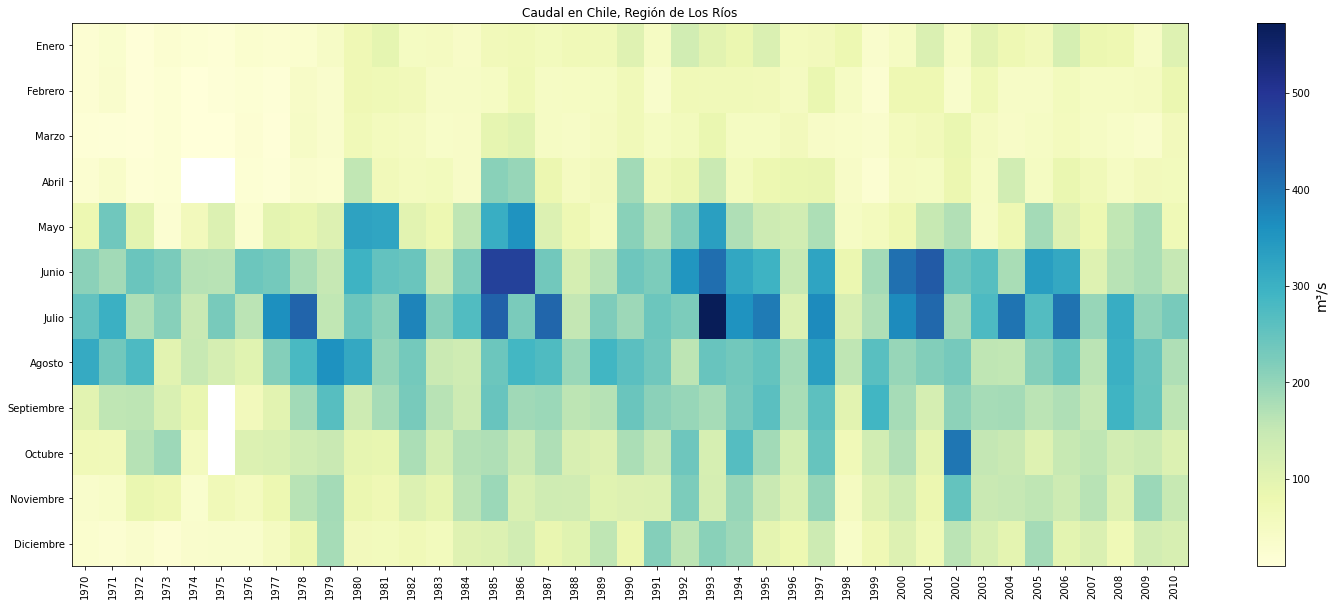

In [ ]:
tilemap(big_data, "qflx", 1970, 2010, region = "Región de Los Ríos")

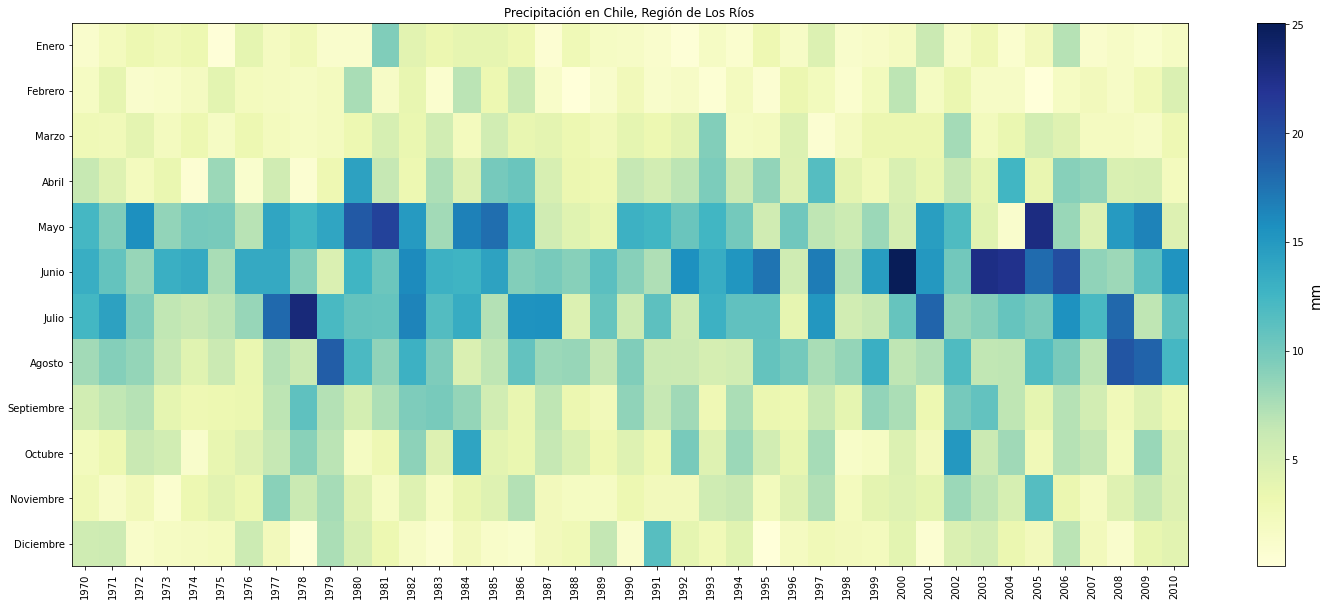

In [ ]:
tilemap(big_data, "pr", 1970, 2010, region = "Región de Los Ríos")

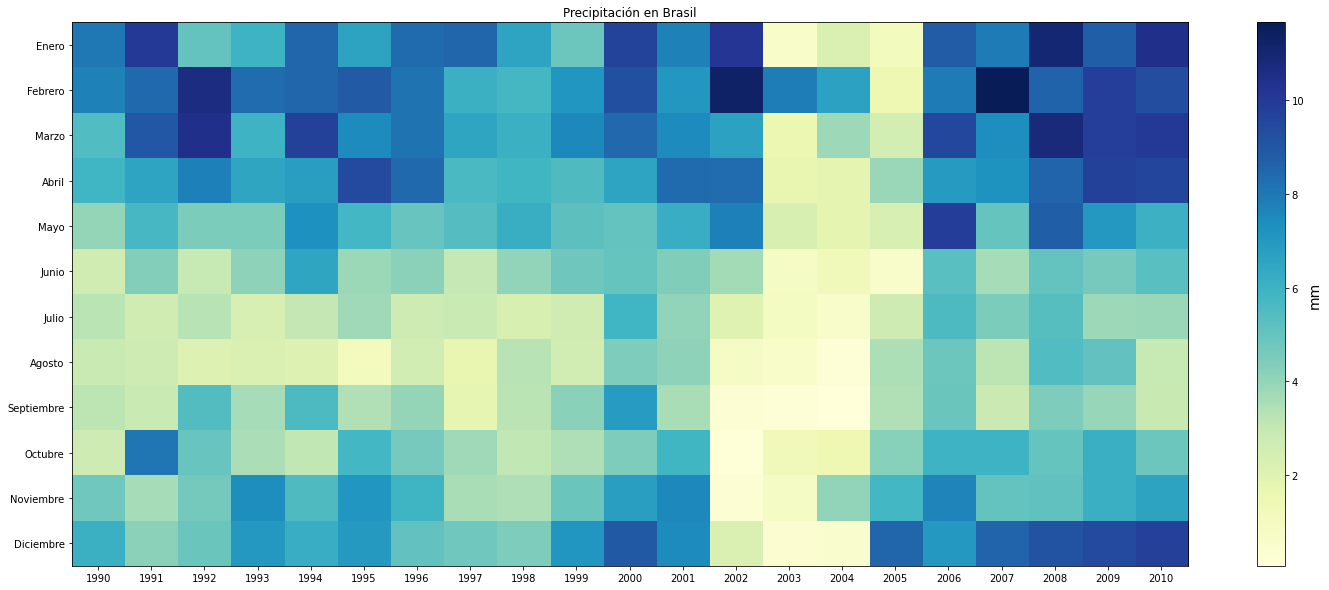

In [ ]:
tilemap(big_data, "pr", 1990, 2010, pais = "Brasil")

In [ ]:
#países y regiones disponibles para consultar
big_data.groupby("pais").region.unique()

pais
Argentina                                       [Jujuy, Salta, Formosa, Misiones, Chaco, Tucum...
Australia                                                                        [Tasmania, otro]
Bolivia                                         [Beni, Pando, La Paz, Santa Cruz, Cochabamba, ...
Brasil                                          [Amapá, Roraima, Amazonas, Pará, Pernambuco, P...
Chile                                           [Región de la Araucanía, Región de Los Ríos, R...
Colombia                                        [Archipiélago de San Andrés, Providencia y San...
Ecuador                                         [Carchi, Santo Domingo de los Tsáchilas, Pichi...
Falkland Islands                                                                           [otro]
France                                                                             [Guyane, otro]
Guyana                                                                         [Demerara-Mahaica]
New Zealand / A

###Radar

In [ ]:
#selected_stations=['BR000082861','BR039402250','BRM00082723','PEM00084401','PE000084377','COM00080234','VEM00080479','BLO000085223',
#                   '12930005','11546001','ARM00087814','180005','200006','220002','270008','290004','330007','330020','340021','360011','370033','38003','390006','400009']
#
#selected_data = big_data[big_data["fecha"]=="2000-05-31"][big_data['codigo_estacion'].isin(selected_stations)]
#selected_data = pd.pivot_table(selected_data, values='value', index=['codigo_estacion'], columns=['tipo_medicion'], fill_value=0)
#selected_data = selected_data.reset_index()
#selected_data = selected_data.iloc[10:14,:].reset_index(drop=True)
#
#for idx, event in selected_data.iloc[:,1:].iteritems():
#    selected_data[idx] = (event - event.min())/(event.max()-event.min())
#
#selected_data

In [ ]:
def spiderData(lista, pais=True):
  spider_data = pd.DataFrame()
  for elemento in lista:
    estaciones = stations(pais=elemento) if pais else stations(region=elemento)
    selected_data = big_data[big_data['codigo_estacion'].isin(estaciones)]
    selected_data = selected_data.groupby('tipo_medicion', as_index=False).mean()
    selected_data = pd.pivot_table(selected_data, values='value', columns=['tipo_medicion'], fill_value=0)
    selected_data['filtro'] = elemento
    spider_data = pd.concat([spider_data, selected_data])
  return spider_data[['filtro','pr','tas','tasmin','tasmax']].reset_index(drop=True)

paises = ['Chile', 'Argentina', 'Perú', 'Brasil']
regiones = ['Región de la Araucanía', 'Región de Arica y Parinacota', 'Región del Maule', 'Región de Magallanes y de la Antártica Chilena']
spider_data = spiderData(regiones, pais=False)

for idx, event in spider_data.iloc[:,1:].iteritems():
    spider_data[idx] = (event - event.min()+10)/(event.max()+10-event.min()+10)
spider_data

filtro   pr  ...    tasmin    tasmax
0                          Región de la Araucanía  NaN  ...  0.401127  0.565687
1                    Región de Arica y Parinacota  NaN  ...  0.708225  0.672749
2                                Región del Maule  NaN  ...  0.445940  0.696213
3  Región de Magallanes y de la Antártica Chilena  0.5  ...  0.291775  0.303787

[4 rows x 5 columns]

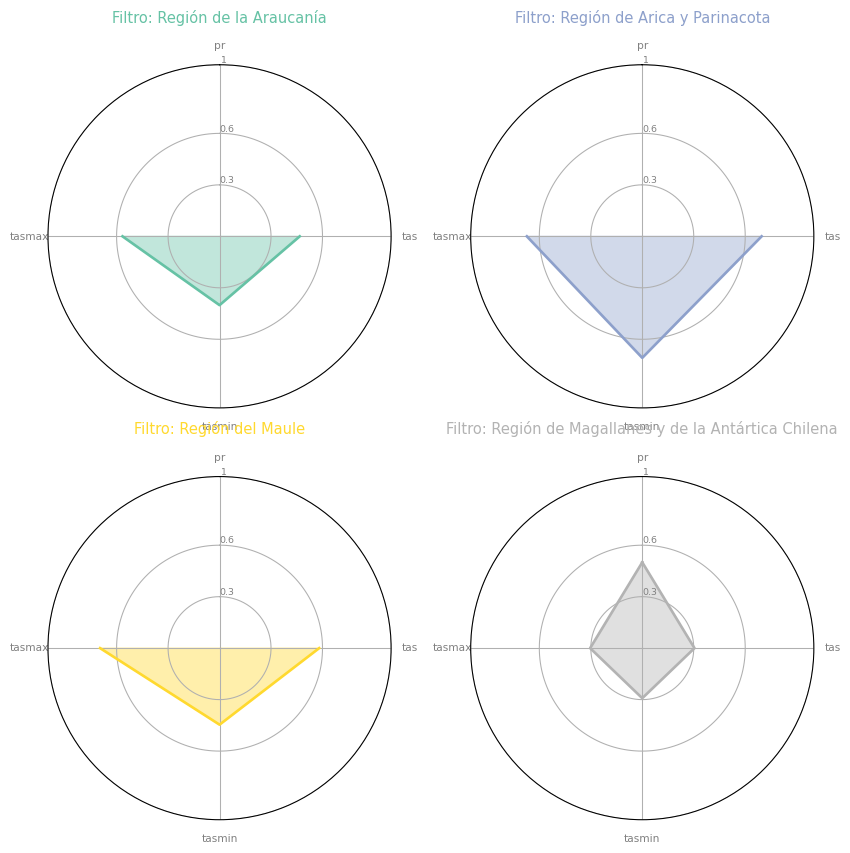

In [ ]:

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):

    # number of variable
    categories=list(spider_data)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.3,0.6,1], ["0.3","0.6","1"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=spider_data.loc[row].drop('filtro').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(spider_data.index))
 
# Loop to plot
for row in range(0, len(spider_data.index)):
    make_spider( row=row, title='Filtro: '+spider_data['filtro'][row], color=my_palette(row))

In [ ]:
# ------- PART 1: Create background
 
# number of variable
categories=list(spider_data)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.3,0.6,1], ["0.3","0.6","1"], color="grey", size=7)
plt.ylim(0,1)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=spider_data.loc[1].drop('filtro').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=spider_data.loc[1]["filtro"])
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=spider_data.loc[3].drop('filtro').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=spider_data.loc[3]["filtro"])
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


NameError: ignored

### Mapas

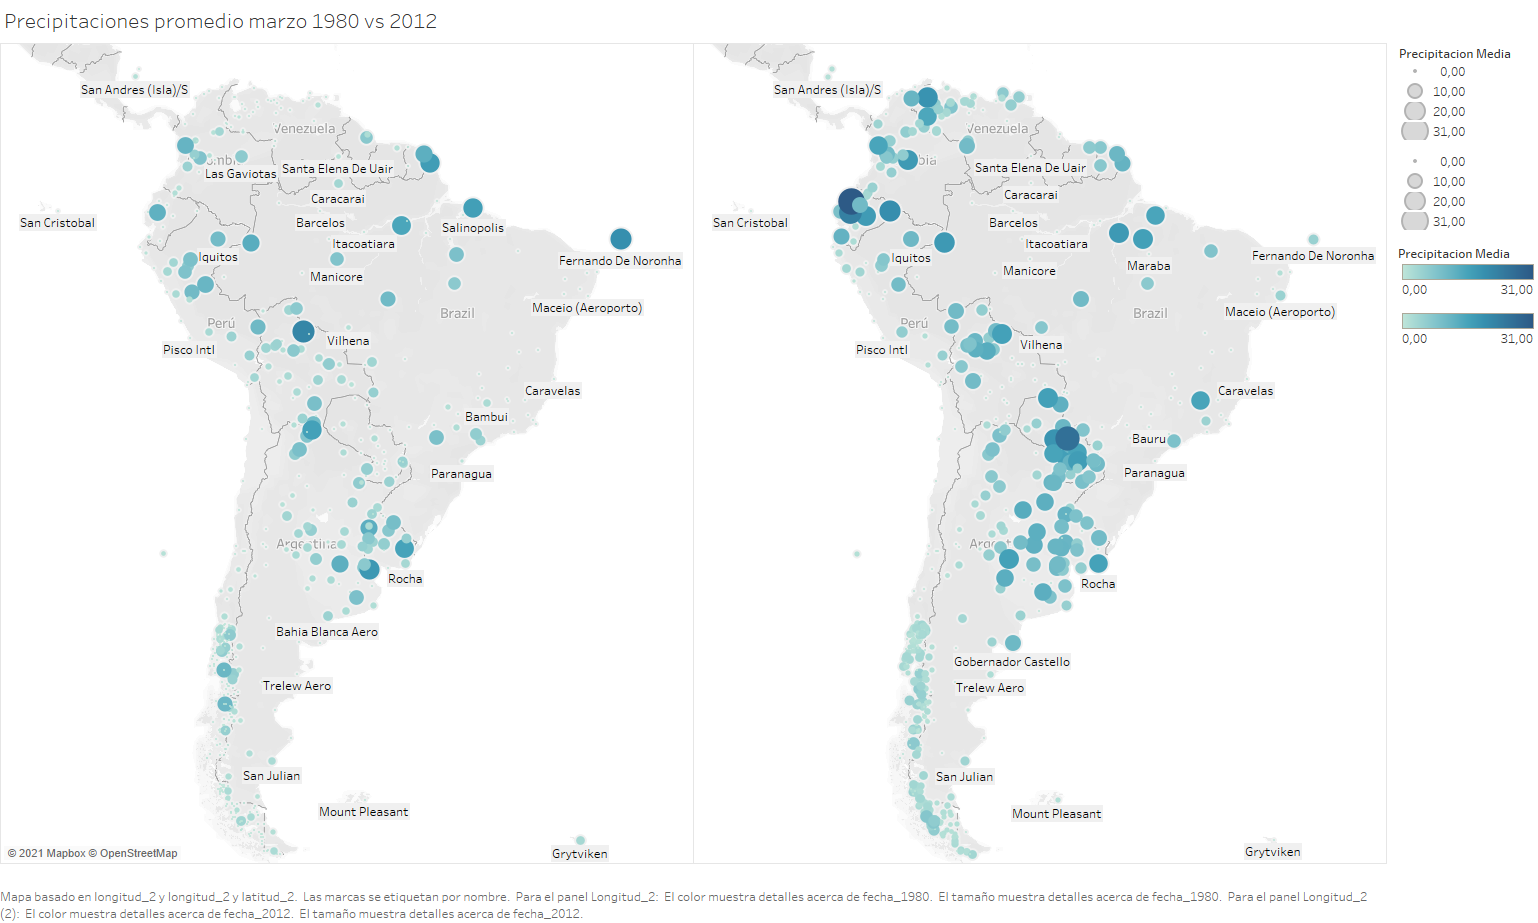



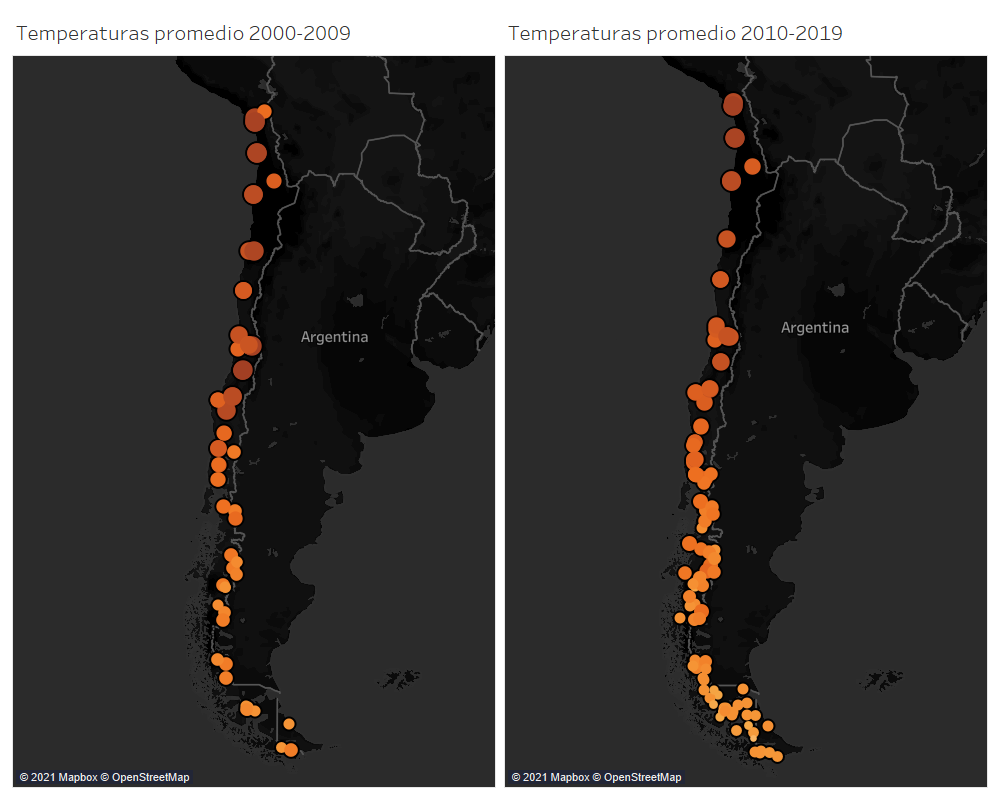